In [119]:
import pandas as pd
import plotly.express as px
import seaborn as sns
import json
import numpy as np

df = pd.read_csv('cleaned_hdi_py_data.csv')
# df

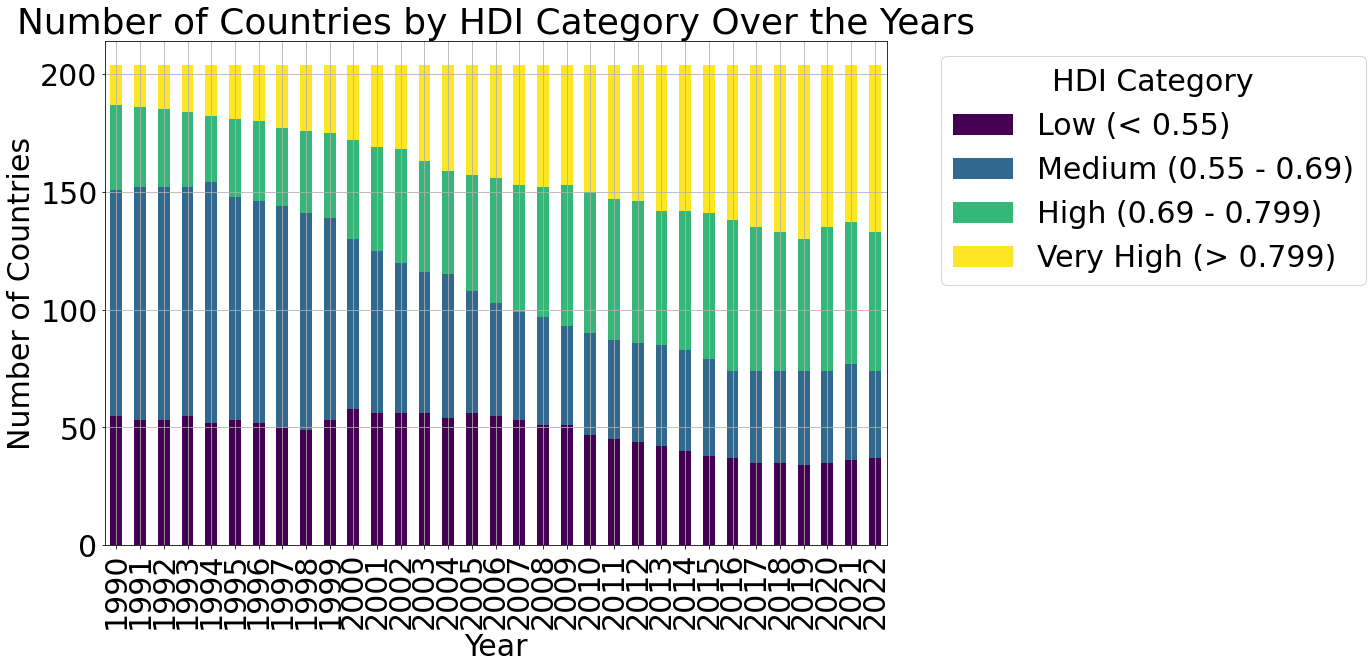

In [121]:
import pandas as pd
import matplotlib.pyplot as plt

# Select relevant columns from 'hdi_1990' to 'hdi_2022'
relevant_columns = ['country', 'hdi_1990', 'hdi_1991', 'hdi_1992', 'hdi_1993', 'hdi_1994',
                    'hdi_1995', 'hdi_1996', 'hdi_1997', 'hdi_1998', 'hdi_1999',
                    'hdi_2000', 'hdi_2001', 'hdi_2002', 'hdi_2003', 'hdi_2004',
                    'hdi_2005', 'hdi_2006', 'hdi_2007', 'hdi_2008', 'hdi_2009',
                    'hdi_2010', 'hdi_2011', 'hdi_2012', 'hdi_2013', 'hdi_2014',
                    'hdi_2015', 'hdi_2016', 'hdi_2017', 'hdi_2018', 'hdi_2019',
                    'hdi_2020', 'hdi_2021', 'hdi_2022']

# Select the relevant columns from the DataFrame
df_hdiyn = df[relevant_columns].copy()

# Melt the DataFrame to long format for easier plotting
df_melted = df_hdiyn.melt(id_vars=['country'], var_name='year', value_name='hdi')

# Extract year from the column name
df_melted['year'] = df_melted['year'].str.extract('(\d+)').astype(int)

# Define bins and labels for HDI categories
bins = [0.0, 0.55, 0.69, 0.799, 1.0]
labels = ['Low (< 0.55)', 'Medium (0.55 - 0.69)', 'High (0.69 - 0.799)', 'Very High (> 0.799)']

# Bin the HDI values
df_melted['category'] = pd.cut(df_melted['hdi'], bins=bins, labels=labels, include_lowest=True)

# Group by year and category
df_grouped = df_melted.groupby(['year', 'category'], observed=True).size().unstack(fill_value=0)

# Plot the data
df_grouped.plot(kind='bar', stacked=True, figsize=(20, 10), colormap='viridis')

plt.title('Number of Countries by HDI Category Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Countries')
plt.legend(title='HDI Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()